[View in Colaboratory](https://colab.research.google.com/github/ayaksnihchsil/angular/blob/master/imdb_lab.ipynb)

In [1]:
#Let's import every package we need
from keras.datasets import imdb
from keras import models, layers, regularizers

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
print('Train data size: {0}'.format(len(train_data)))
print('Test data size: {0}'.format(len(test_data)))

Train data size: 25000
Test data size: 25000


In [5]:
print('The number of words is 10000, it means that goes from 0 to {0}'.format(max(max(i) for i in train_data)))

The number of words is 10000, it means that goes from 0 to 9999


In [6]:
print('Number of output classes: {0} (positive/negative)'.format(len(set(train_labels))))

Number of output classes: 2 (positive/negative)


**Vectorize inputs**

In [0]:
def vectorize_data(data, num_words=10000): #keras.utils.to_categorical won't fit, we need a matrix.
    out_data = np.zeros([len(data), num_words])
    for i, d in enumerate(data):
        out_data[i,d]=1.
    return out_data

In [0]:
train_x = vectorize_data(train_data)
test_x = vectorize_data(test_data)

In [0]:
train_y = np.asarray(train_labels).astype(np.float32)
test_y = np.asarray(test_labels).astype(np.float32)

**Let's create models**

In [0]:
def first_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [0]:
model_1 = first_model()
hist_1 = model_1.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0) 
#I'm aware we are doing validation on the test set, but dont worry, we are not going to tune a parameter, it is just to visualize results.
#verbose is 0, if you want to see iterations turn it to 1 or just remove the parameter.

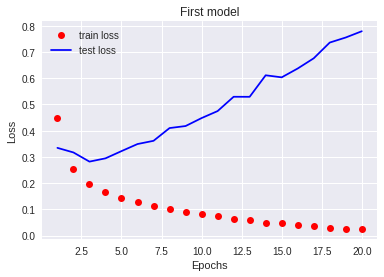

In [12]:
epochs = range(1, len(hist_1.history['acc'])+1)

plt.plot(epochs, hist_1.history['loss'], 'ro', label='train loss')
plt.plot(epochs, hist_1.history['val_loss'], 'b-', label='test loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('First model')

plt.show()

**The model is overfitting, now let's try a simpler model**

In [0]:
def simple_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(4, activation='relu', input_shape = (10000,)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics =['acc'])
    
    return model

In [0]:
model_2 = simple_model()
hist_2 = model_2.fit(train_x, train_y, epochs=20, batch_size=512, validation_data =(test_x, test_y), verbose=0)

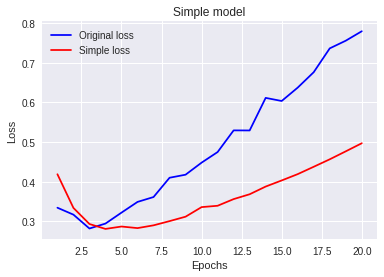

In [15]:
epochs = range(1, 1+len(hist_2.history['loss']))

plt.plot(epochs, hist_1.history['val_loss'], 'b',label='Original loss')
plt.plot(epochs, hist_2.history['val_loss'], 'r', label='Simple loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Simple model')
plt.show()

**What about a bigger model?**

In [0]:
def bigger_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape = (10000,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics =['acc'])
    
    return model

In [0]:
model_3 = bigger_model()
hist_3 = model_3.fit(train_x, train_y, epochs=20, batch_size=512, validation_data =(test_x, test_y), verbose=0)

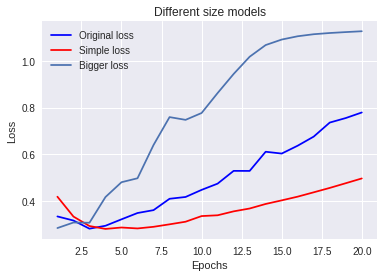

In [18]:
epochs = range(1, 1+len(hist_2.history['loss']))

plt.plot(epochs, hist_1.history['val_loss'], 'b',label='Original loss')
plt.plot(epochs, hist_2.history['val_loss'], 'r', label='Simple loss')
plt.plot(epochs, hist_3.history['val_loss'], label='Bigger loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Different size models')
plt.show()

**L2 Regularizer**

In [0]:
def L2_model(coef=0.001):
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(coef), input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(coef)))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [0]:
model_4 = L2_model(0.001)
model_5 = L2_model(0.005)
hist_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)
hist_5 = model_5.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)

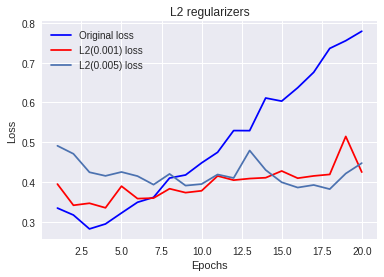

In [21]:
epochs = range(1, 1+len(hist_2.history['loss']))

plt.plot(epochs, hist_1.history['val_loss'], 'b',label='Original loss')
plt.plot(epochs, hist_4.history['val_loss'], 'r', label='L2(0.001) loss')
plt.plot(epochs, hist_5.history['val_loss'], label='L2(0.005) loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L2 regularizers')
plt.show()

**L1 Regularizer**

In [0]:
def L1_model(coef=0.001):
    
    model = models.Sequential()
    
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(coef), input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(coef)))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    
    return model

In [0]:
model_6 = L1_model(0.001)
model_7 = L1_model(0.005)
hist_6 = model_6.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)
hist_7 = model_7.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)

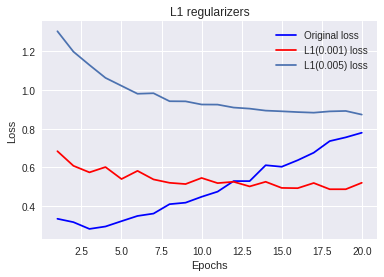

In [24]:
epochs = range(1, 1+len(hist_2.history['loss']))

plt.plot(epochs, hist_1.history['val_loss'], 'b',label='Original loss')
plt.plot(epochs, hist_6.history['val_loss'], 'r', label='L1(0.001) loss')
plt.plot(epochs, hist_7.history['val_loss'], label='L1(0.005) loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L1 regularizers')
plt.show()

**Let's compare both, L1 and L2**

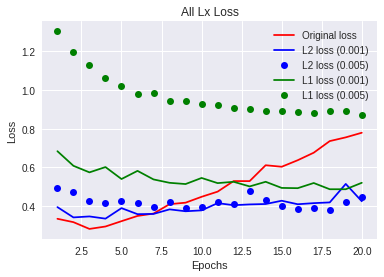

In [25]:
epochs = range(1, 1+len(hist_1.history['loss']))


plt.plot( epochs, hist_1.history['val_loss'],'r-', label='Original loss')
plt.plot(epochs, hist_4.history['val_loss'], 'b-', label='L2 loss (0.001)')
plt.plot( epochs, hist_5.history['val_loss'],'bo', label='L2 loss (0.005)')
plt.plot(epochs, hist_6.history['val_loss'], 'g-', label='L1 loss (0.001)')
plt.plot( epochs, hist_7.history['val_loss'],'go', label='L1 loss (0.005)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('All Lx Loss')
plt.legend()
plt.show()

**Dropout**

In [0]:
def dropout_model (dropout_rate=0.2):
    
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics =['acc'])
    
    return model

In [0]:
model_10 = dropout_model(0.2)
model_11 = dropout_model(0.5)
hist_10 = model_10.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)
hist_11 = model_11.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(test_x, test_y), verbose=0)

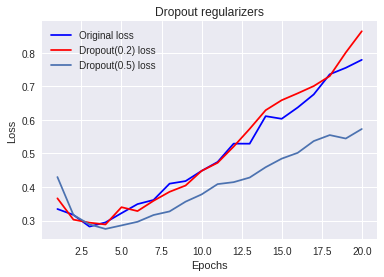

In [28]:
epochs = range(1, 1+len(hist_1.history['loss']))

plt.plot(epochs, hist_1.history['val_loss'], 'b',label='Original loss')
plt.plot(epochs, hist_10.history['val_loss'], 'r', label='Dropout(0.2) loss')
plt.plot(epochs, hist_11.history['val_loss'], label='Dropout(0.5) loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Dropout regularizers')
plt.show()

**Let's compare all regularizers!!**

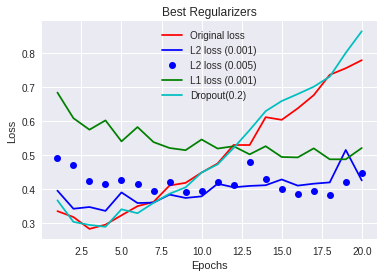

In [29]:
epochs = range(1, 1+len(hist_1.history['loss']))


plt.plot( epochs, hist_1.history['val_loss'],'r-', label='Original loss')
plt.plot(epochs, hist_4.history['val_loss'], 'b-', label='L2 loss (0.001)')
plt.plot( epochs, hist_5.history['val_loss'],'bo', label='L2 loss (0.005)')
plt.plot(epochs, hist_6.history['val_loss'], 'g-', label='L1 loss (0.001)')

plt.plot( epochs, hist_10.history['val_loss'],'c-', label='Dropout(0.2)')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Best Regularizers')
plt.legend()
plt.show()